In [1495]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [1496]:
file1 = pd.read_csv('observations.csv')
file2 = pd.read_csv('species_info.csv')
file1_2 = glob.glob('*.csv')
files = [pd.read_csv(filename) for filename in file1_2]
file3 = pd.concat(files)

In [1497]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [1498]:
file1.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [1499]:
print(f'''There are {file1.park_name.nunique()} unique area under examination and these are as follows:
{file1.park_name.unique()}''')

There are 4 unique area under examination and these are as follows:
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [1500]:
file1.park_name.replace('Great Smoky Mountains National Park', 'Great Smoky', inplace=True)
file1.park_name.replace('Yosemite National Park', 'Yosemite', inplace=True)
file1.park_name.replace('Bryce National Park', 'Bryce', inplace=True)
file1.park_name.replace('Yellowstone National Park', 'Yellowstone', inplace=True)

In [1501]:
file1[file1.park_name == 'Great Smoky']['observations'].mean()

74.14491758241758

In [1502]:
avg_animal = file1[['park_name', 'observations']].groupby('park_name').mean().reset_index()

In [1503]:
avg_animal

,park_name,observations
0,Bryce,98.905391
1,Great Smoky,74.144918
2,Yellowstone,247.864354
3,Yosemite,148.236951


In [1504]:
total_animal = file1[['park_name', 'observations']].groupby('park_name').sum().reset_index()

In [1505]:
total_animal

,park_name,observations
0,Bryce,576025
1,Great Smoky,431820
2,Yellowstone,1443562
3,Yosemite,863332


In [1506]:
total_animal['proportions'] = np.round(total_animal.observations*100 / total_animal.observations.sum(), 2)

In [1507]:
total_animal

,park_name,observations,proportions
0,Bryce,576025,17.38
1,Great Smoky,431820,13.03
2,Yellowstone,1443562,43.55
3,Yosemite,863332,26.05


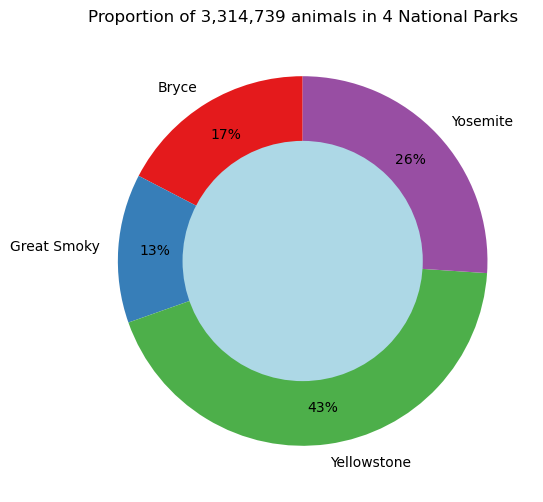

<Figure size 640x480 with 0 Axes>

In [1508]:
plt.figure(figsize=[12, 6])
sns.set_palette('Set1')
plt.pie(total_animal['observations'], autopct='%d%%', startangle=90, labels=total_animal.park_name, pctdistance=0.8)
plt.title(f'Proportion of {total_animal.observations.sum():,} animals in {len(total_animal.park_name)} National Parks')
hole = plt.Circle((0, 0), 0.65, facecolor='lightblue')
plt.gcf().gca().add_artist(hole)
plt.savefig('donut_animals_parks.png')
plt.show()
plt.clf()

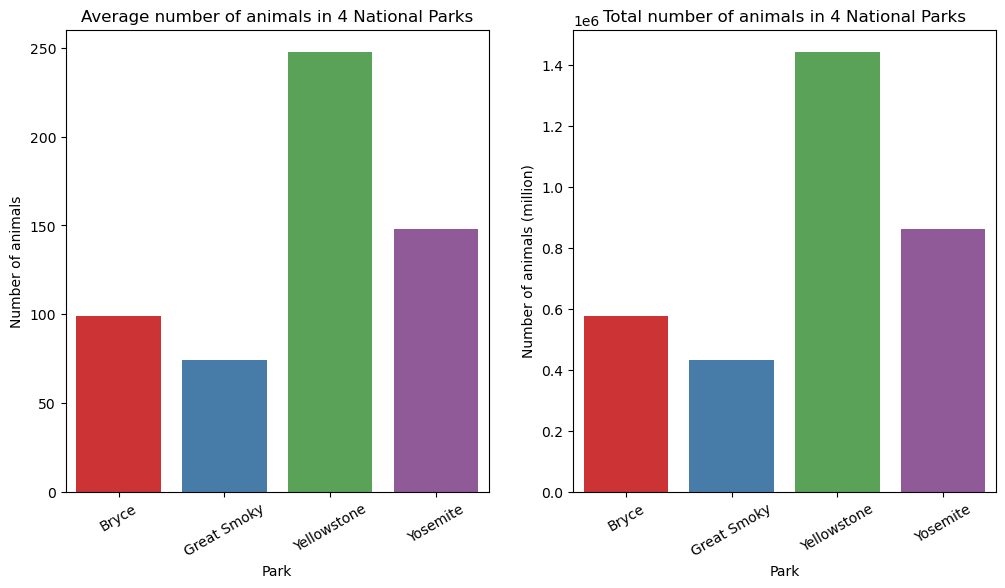

<Figure size 640x480 with 0 Axes>

In [1509]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
sns.barplot(x='park_name', y='observations', data=avg_animal)
plt.title(f'Average number of animals in {avg_animal.park_name.nunique()} National Parks')
plt.xlabel('Park')
plt.ylabel('Number of animals')
plt.xticks(rotation=30)
plt.subplot(1,2,2)
sns.barplot(x='park_name', y='observations', data=total_animal)
plt.title(f'Total number of animals in {total_animal.park_name.nunique()} National Parks')
plt.xlabel('Park')
plt.ylabel('Number of animals (million)')
plt.xticks(rotation=30)
plt.savefig('bar_animals_parks.png')
plt.show()
plt.clf()

In [1510]:
print(f'There are {len(file1.observations):,} observations including {file1.observations.sum():,} animals total in the sample')

There are 23,296 observations including 3,314,739 animals total in the sample


In [1511]:
print(f'There are {file1.scientific_name.nunique()} species among the animals')

There are 5541 species among the animals


In [1512]:
print(f'The max number of animals in one observation is {file1.observations.max()}')
print(f'The min number of animals in one observation is {file1.observations.min()}')
print(f'The average number of animals in one observation is {int(file1.observations.mean())}')

The max number of animals in one observation is 321
The min number of animals in one observation is 9
The average number of animals in one observation is 142


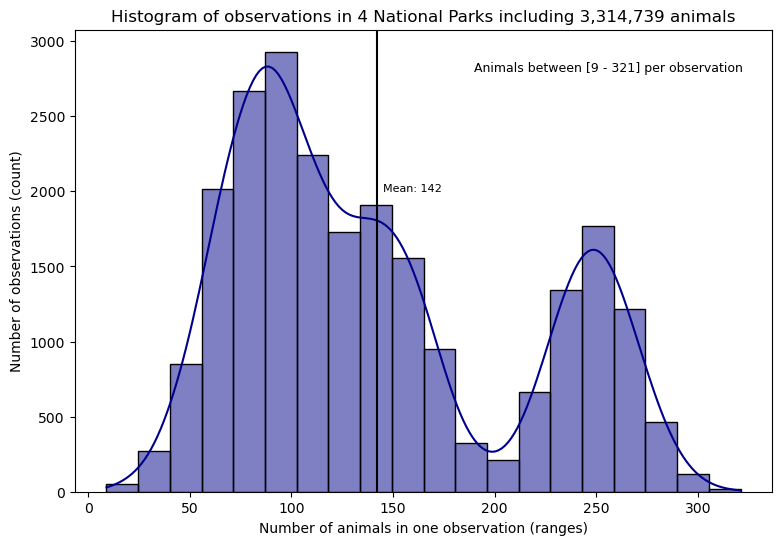

<Figure size 640x480 with 0 Axes>

In [1513]:
plt.figure(figsize=[9, 6])
sns.histplot(file1.observations, kde=True, bins=20, color='darkblue')
plt.title(f'Histogram of observations in {file1.park_name.nunique()} National Parks including {file1.observations.sum():,} animals')
plt.xlabel('Number of animals in one observation (ranges)')
plt.ylabel('Number of observations (count)')
plt.text(x=190, y=2800, s=f'''Animals between [{file1.observations.min()} - {file1.observations.max()}] per observation''',
fontsize=9)
plt.axvline(np.mean(file1.observations), color='black')
plt.text(x=145, y=2000, s=f'Mean: {int(file1.observations.mean())}', fontsize=8)
plt.savefig('hist_observs.png')
plt.show()
plt.clf()

In [1514]:
print('''You can see that there are 2 peaks in this distribution, meaning that the highest number of observations have 2 occurences 
at around 85 animals and 250 animals. Let us examine where are those observations!''')

You can see that there are 2 peaks in this distribution, meaning that the highest number of observations have 2 occurences 
at around 85 animals and 250 animals. Let us examine where are those observations!


In [1550]:
print('First we calculate the number of observations in the Parks succesively.')

First we calculate the number of observations in the Parks succesively.


In [1516]:
park1 = file1[file1.park_name == 'Great Smoky']
park2 = file1[file1.park_name == 'Yosemite']
park3 = file1[file1.park_name == 'Bryce']
park4 = file1[file1.park_name == 'Yellowstone']

In [1517]:
park_all = [park1, park2, park3, park4]

In [1518]:
for park in park_all:
    print(f'The number of observations in {park.park_name.unique()} Park is {len(park.observations)}')

The number of observations in ['Great Smoky'] Park is 5824
The number of observations in ['Yosemite'] Park is 5824
The number of observations in ['Bryce'] Park is 5824
The number of observations in ['Yellowstone'] Park is 5824


In [1552]:
print('''You can see that the number of observations is exactly the same in every Park. It means that the majority of the 
observations below 85 animals is related to the Great Smokey N.P. because of having the lowest average animal number
in one observation, and because of the existence of the other observations of other Parks. 

On the other hand observations with more than 150 animals mostly related to the Yellowstone N.P. because we calculated there the highest mean of
animals among the 4 Parks and there is a relative big difference between the average animal number of Yellostone and Yosemite.
It was worth doing some math, and we can also find the min and the max animal number of every Park, but that is not a must.''')

You can see that the number of observations is exactly the same in every Park. It means that the majority of the 
observations below 85 animals is related to the Great Smokey N.P. because of having the lowest average animal number
in one observation, and because of the existence of the other observations of other Parks. 

On the other hand observations with more than 150 animals mostly related to the Yellowstone N.P. because we calculated there the highest mean of
animals among the 4 Parks and there is a relative big difference between the average animal number of Yellostone and Yosemite.
It was worth doing some math, and we can also find the min and the max animal number of every Park, but that is not a must.


In [1520]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [1521]:
file2.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [1522]:
file2.nunique()

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

In [1523]:
len(file2.scientific_name) - file2.scientific_name.nunique()

283

In [1524]:
file2.scientific_name.nunique() == file1.scientific_name.nunique()

True

In [1525]:
file2.duplicated(subset='scientific_name').value_counts()

False    5541
True      283
dtype: int64

In [1526]:
file2.duplicated(subset='scientific_name').value_counts().loc[True]

283

In [1527]:
file2 = file2.drop_duplicates(subset='scientific_name')

In [1528]:
file2.duplicated(subset='scientific_name').value_counts()

False    5541
dtype: int64

In [1529]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  178 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


In [1530]:
file2.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [1531]:
endangered_species = file2[~file2.conservation_status.isna()].reset_index()

In [1532]:
endangered_species

,index,category,scientific_name,common_names,conservation_status
0,7,Mammal,Canis latrans,Coyote,Species of Concern
1,8,Mammal,Canis lupus,Gray Wolf,Endangered
2,9,Mammal,Canis rufus,Red Wolf,Endangered
3,29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
4,30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
...,...,...,...,...,...
173,5302,Vascular Plant,Callitriche marginata,Winged Water-Starwort,Species of Concern
174,5399,Vascular Plant,Camissonia sierrae ssp. alticola,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
175,5426,Vascular Plant,Epilobium oreganum,"Grants Pass Willowherb, Oregon Fireweed",Species of Concern
176,5436,Vascular Plant,Botrychium ascendens,"Trianglelobe Moonwort, Upswept Moonwort",Species of Concern


In [1533]:
endangered_species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [1534]:
endangered_species['conservation_status'].unique()

array(['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'],
      dtype=object)

In [1535]:
#Hi Rob, what I would like to do here is to join file1 and file2. "scientific_name" column must be the column where they should 
#connect to each other.



In [1536]:
print(f'The number of endangered species is {len(file2.scientific_name[~file2.conservation_status.isna()])}')

The number of endangered species is 178


In [1537]:
newdf = file1.merge(endangered_species, how='left')

In [1538]:
newdf.head()

,scientific_name,park_name,observations,index,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky,68,NaN,NaN,NaN,NaN
1,Neovison vison,Great Smoky,77,NaN,NaN,NaN,NaN
2,Prunus subcordata,Yosemite,138,NaN,NaN,NaN,NaN
3,Abutilon theophrasti,Bryce,84,NaN,NaN,NaN,NaN
4,Githopsis specularioides,Great Smoky,85,NaN,NaN,NaN,NaN


In [1539]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23296 entries, 0 to 23295
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   scientific_name      23296 non-null  object 
 1   park_name            23296 non-null  object 
 2   observations         23296 non-null  int64  
 3   index                760 non-null    float64
 4   category             760 non-null    object 
 5   common_names         760 non-null    object 
 6   conservation_status  760 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ MB


In [1540]:
newdf_values = newdf[~newdf.index.isna() & ~newdf.category.isna() & ~newdf.common_names.isna() & ~newdf.conservation_status.isna()].reset_index()

In [1541]:
newdf_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              760 non-null    int64  
 1   scientific_name      760 non-null    object 
 2   park_name            760 non-null    object 
 3   observations         760 non-null    int64  
 4   index                760 non-null    float64
 5   category             760 non-null    object 
 6   common_names         760 non-null    object 
 7   conservation_status  760 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 47.6+ KB


In [1542]:
newdf_values.head()

,level_0,scientific_name,park_name,observations,index,category,common_names,conservation_status
0,24,Zizia trifoliata,Yosemite,135,634.0,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,36,Camissonia sierrae ssp. alticola,Bryce,84,5399.0,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
2,71,Tofieldia glabra,Great Smoky,75,593.0,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
3,94,Accipiter cooperii,Bryce,95,91.0,Bird,Cooper's Hawk,Species of Concern
4,118,Dichanthelium acuminatum var. acuminatum,Yosemite,123,2189.0,Vascular Plant,Tapered Rosette Grass,Species of Concern


In [1543]:
endangered_animals = newdf_values[['park_name', 'observations']].groupby('park_name').sum().reset_index()

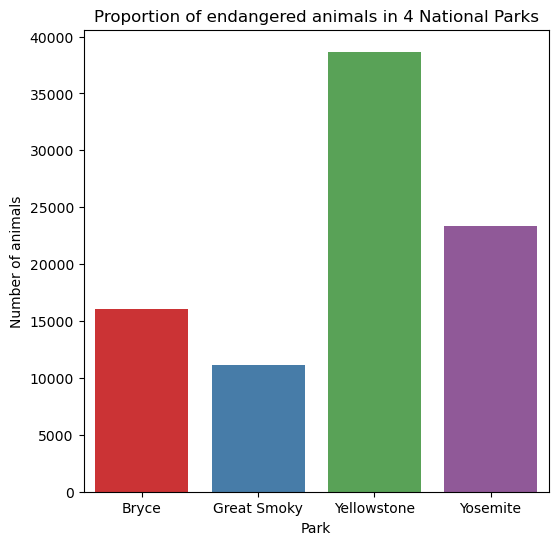

<Figure size 640x480 with 0 Axes>

In [1544]:
plt.figure(figsize=[6,6])
sns.barplot(x='park_name', y='observations', data=endangered_animals)
plt.title(f'Proportion of endangered animals in {endangered_animals.park_name.nunique()} National Parks')
plt.xlabel('Park')
plt.ylabel('Number of animals')
plt.savefig('bar_dangeranims.png')
plt.show()
plt.clf()

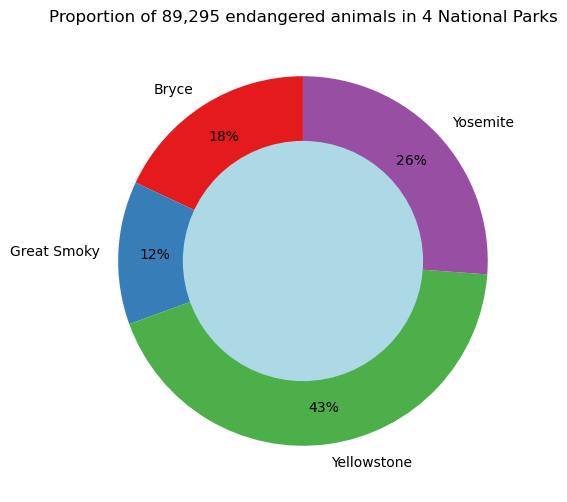

<Figure size 640x480 with 0 Axes>

In [1545]:
plt.figure(figsize=[12, 6])
sns.set_palette('Set1')
plt.pie(endangered_animals['observations'], autopct='%d%%', startangle=90, labels=endangered_animals.park_name, pctdistance=0.8)
plt.title(f'Proportion of {dangered_animals.observations.sum():,} endangered animals in {len(dangered_animals.park_name)} National Parks')
hole = plt.Circle((0, 0), 0.65, facecolor='lightblue')
plt.gcf().gca().add_artist(hole)
plt.savefig('donut_dangeranims_parks.png')
plt.show()
plt.clf()

In [1546]:
newdf_values.head()

,level_0,scientific_name,park_name,observations,index,category,common_names,conservation_status
0,24,Zizia trifoliata,Yosemite,135,634.0,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,36,Camissonia sierrae ssp. alticola,Bryce,84,5399.0,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
2,71,Tofieldia glabra,Great Smoky,75,593.0,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
3,94,Accipiter cooperii,Bryce,95,91.0,Bird,Cooper's Hawk,Species of Concern
4,118,Dichanthelium acuminatum var. acuminatum,Yosemite,123,2189.0,Vascular Plant,Tapered Rosette Grass,Species of Concern


In [1547]:
grouped = newdf_values[['category', 'observations']].groupby('category').sum().reset_index()

In [1548]:
grouped

,category,observations
0,Amphibian,2752
1,Bird,38608
2,Fish,3396
3,Mammal,16449
4,Nonvascular Plant,2705
5,Reptile,2536
6,Vascular Plant,22849


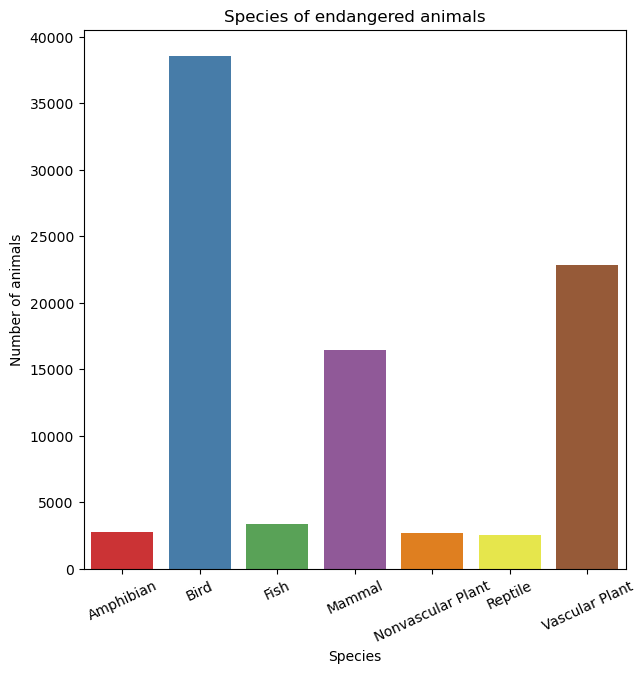

<Figure size 640x480 with 0 Axes>

In [1549]:
plt.figure(figsize=[7,7])
sns.barplot(x='category', y='observations', data=grouped)
plt.title('Species of endangered animals')
plt.xlabel('Species')
plt.ylabel('Number of animals')
plt.xticks(rotation=25)
plt.savefig('bar_endangerspecies.png')
plt.show()
plt.clf()